In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/data/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnet.h5'


In [4]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 10
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 64
imagey = 64

In [5]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=4, categories=2, depth=29, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1, 'h': 2, 'w': 3}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnet.h5', multievent=False, nboxes=10, npz_directory='/home/sancere/Kepler/Incucyte/data/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 1121
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
number of  images:	 59
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
loading weights
(1121, 1, 1, 42) 10
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Train on 1121 samples, validate on 59 samples
Epoch 1/250
1121/1121 [==============================] - 109s 97ms/step - loss: 11.2219 - accuracy: 0.0196 - val_loss: 8.1259 - val_accuracy: 0.4915

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 8.125938415527344, 'val_accuracy': 0.49152541160583496, 'loss': 11.2219404021509, 'accuracy': 0.019625334, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

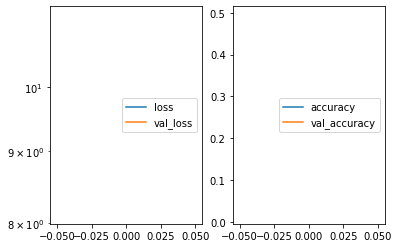

Predicted cell: Cells Probability: [[0.70561135]]
True Cell type: Cells
x [[0.47356647]]
True positional value x 0.65625
y [[0.540678]]
True positional value y 0.65625
h [[0.45425096]]
True positional value h 0.390625
w [[0.5158502]]
True positional value w 0.390625


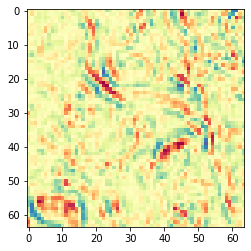

Epoch 2/250
1121/1121 [==============================] - 104s 93ms/step - loss: 9.3532 - accuracy: 0.0607 - val_loss: 6.1306 - val_accuracy: 0.4915

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 6.130558490753174, 'val_accuracy': 0.49152541160583496, 'loss': 9.35317713910187, 'accuracy': 0.060660124, 'lr': 1e-06}


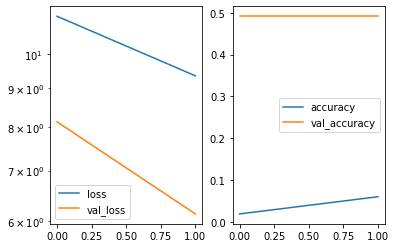

Predicted cell: Cells Probability: [[0.6945326]]
True Cell type: Cells
x [[0.46120486]]
True positional value x 0.65625
y [[0.5378692]]
True positional value y 0.65625
h [[0.44278622]]
True positional value h 0.390625
w [[0.4454283]]
True positional value w 0.390625


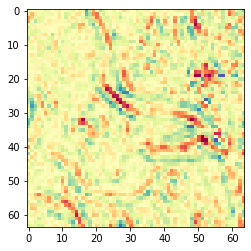

Epoch 3/250
1121/1121 [==============================] - 105s 93ms/step - loss: 8.7283 - accuracy: 0.1106 - val_loss: 5.4238 - val_accuracy: 0.3220

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.423841953277588, 'val_accuracy': 0.32203391194343567, 'loss': 8.7283188907511, 'accuracy': 0.11061552, 'lr': 1e-06}


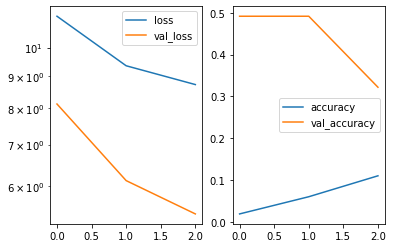

Predicted cell: Cells Probability: [[0.61067027]]
True Cell type: Cells
x [[0.46654162]]
True positional value x 0.65625
y [[0.53164357]]
True positional value y 0.34375
h [[0.4674832]]
True positional value h 0.390625
w [[0.4110366]]
True positional value w 0.390625


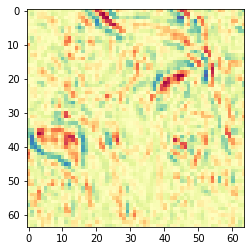

Epoch 4/250
1121/1121 [==============================] - 104s 93ms/step - loss: 9.2034 - accuracy: 0.1383 - val_loss: 5.2279 - val_accuracy: 0.2542

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.227914333343506, 'val_accuracy': 0.2542372941970825, 'loss': 9.20335472321319, 'accuracy': 0.13826941, 'lr': 1e-06}


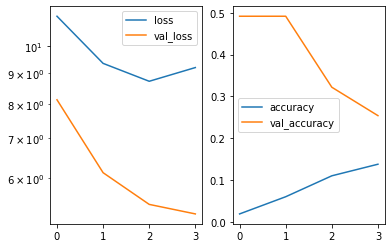

Predicted cell: Cells Probability: [[0.5543926]]
True Cell type: Normal
x [[0.48054594]]
True positional value x 0.5
y [[0.5176184]]
True positional value y 0.5
h [[0.46890232]]
True positional value h 0.390625
w [[0.40181255]]
True positional value w 0.0


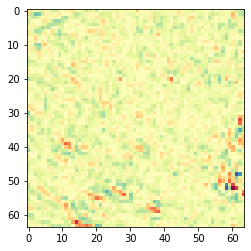

Epoch 5/250
1121/1121 [==============================] - 106s 94ms/step - loss: 8.8762 - accuracy: 0.2239 - val_loss: 5.2186 - val_accuracy: 0.1356

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.218592166900635, 'val_accuracy': 0.1355932205915451, 'loss': 8.876202231959292, 'accuracy': 0.22390723, 'lr': 1e-06}


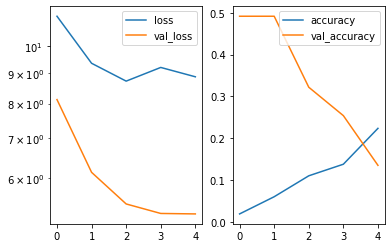

Predicted cell: Cells Probability: [[0.5482649]]
True Cell type: Cells
x [[0.5022774]]
True positional value x 0.5
y [[0.5179399]]
True positional value y 0.34375
h [[0.44166875]]
True positional value h 0.390625
w [[0.3951042]]
True positional value w 0.390625


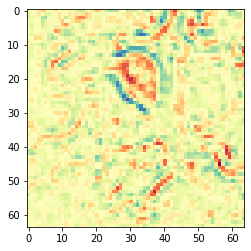

Epoch 6/250
1121/1121 [==============================] - 104s 93ms/step - loss: 7.9554 - accuracy: 0.3274 - val_loss: 5.3418 - val_accuracy: 0.0847

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.341793060302734, 'val_accuracy': 0.08474576473236084, 'loss': 7.955420941566379, 'accuracy': 0.32738626, 'lr': 1e-06}


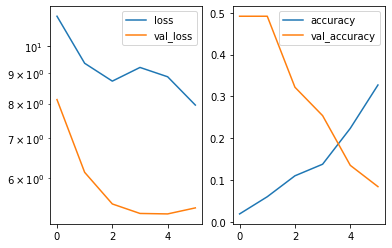

Predicted cell: Cells Probability: [[0.5095295]]
True Cell type: Cells
x [[0.48879924]]
True positional value x 0.34375
y [[0.5188363]]
True positional value y 0.65625
h [[0.44552886]]
True positional value h 0.390625
w [[0.43804884]]
True positional value w 0.390625


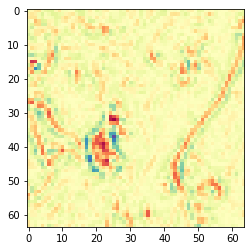

Epoch 7/250
1121/1121 [==============================] - 104s 93ms/step - loss: 7.3423 - accuracy: 0.3872 - val_loss: 5.5651 - val_accuracy: 0.0847

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.565145015716553, 'val_accuracy': 0.08474576473236084, 'loss': 7.3423072766449495, 'accuracy': 0.38715434, 'lr': 1e-06}


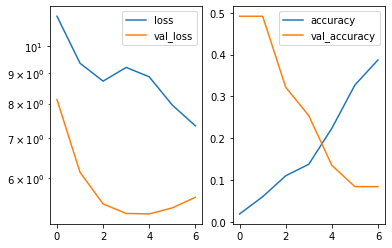

Predicted cell: Cells Probability: [[0.56368256]]
True Cell type: Cells
x [[0.48490041]]
True positional value x 0.5
y [[0.5092898]]
True positional value y 0.65625
h [[0.4714724]]
True positional value h 0.390625
w [[0.44629997]]
True positional value w 0.390625


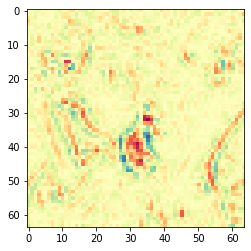

Epoch 8/250
1121/1121 [==============================] - 108s 96ms/step - loss: 7.0441 - accuracy: 0.4746 - val_loss: 5.6435 - val_accuracy: 0.1186

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.643540859222412, 'val_accuracy': 0.11864406615495682, 'loss': 7.044140720027137, 'accuracy': 0.47457626, 'lr': 1e-06}


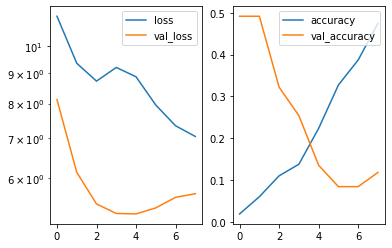

Predicted cell: Cells Probability: [[0.5084563]]
True Cell type: Cells
x [[0.5132873]]
True positional value x 0.34375
y [[0.5269404]]
True positional value y 0.5
h [[0.46049315]]
True positional value h 0.390625
w [[0.43927607]]
True positional value w 0.390625


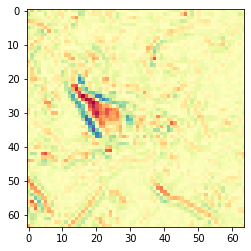

Epoch 9/250
1121/1121 [==============================] - 107s 95ms/step - loss: 6.7951 - accuracy: 0.5781 - val_loss: 5.6021 - val_accuracy: 0.2373

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.602105140686035, 'val_accuracy': 0.23728813230991364, 'loss': 6.795067080209343, 'accuracy': 0.5780553, 'lr': 1e-06}


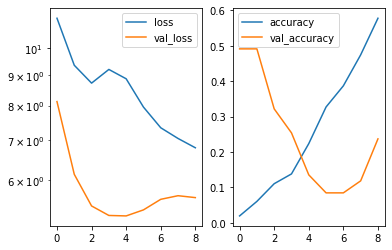

Predicted cell: Cells Probability: [[0.58210045]]
True Cell type: Cells
x [[0.5146397]]
True positional value x 0.34375
y [[0.49927774]]
True positional value y 0.5
h [[0.4565102]]
True positional value h 0.390625
w [[0.4518272]]
True positional value w 0.390625


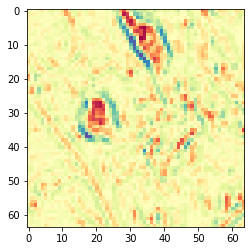

Epoch 10/250
1121/1121 [==============================] - 107s 95ms/step - loss: 6.4979 - accuracy: 0.6387 - val_loss: 5.4459 - val_accuracy: 0.2542

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.445868015289307, 'val_accuracy': 0.2542372941970825, 'loss': 6.497854110282197, 'accuracy': 0.63871545, 'lr': 1e-06}


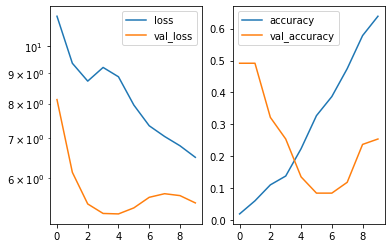

Predicted cell: Cells Probability: [[0.5409908]]
True Cell type: Cells
x [[0.49092373]]
True positional value x 0.5
y [[0.5343588]]
True positional value y 0.5
h [[0.4613191]]
True positional value h 0.390625
w [[0.39715165]]
True positional value w 0.390625


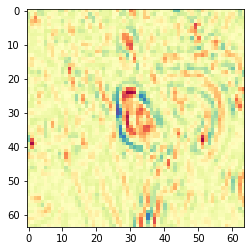

Epoch 11/250
1121/1121 [==============================] - 106s 95ms/step - loss: 5.9831 - accuracy: 0.7056 - val_loss: 5.2416 - val_accuracy: 0.4576

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.241613388061523, 'val_accuracy': 0.4576271176338196, 'loss': 5.983142289596408, 'accuracy': 0.70562, 'lr': 1e-06}


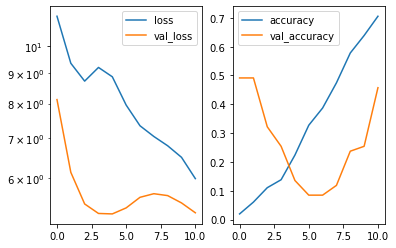

Predicted cell: Cells Probability: [[0.65186507]]
True Cell type: Cells
x [[0.49447644]]
True positional value x 0.65625
y [[0.48655155]]
True positional value y 0.65625
h [[0.4170794]]
True positional value h 0.390625
w [[0.33875787]]
True positional value w 0.390625


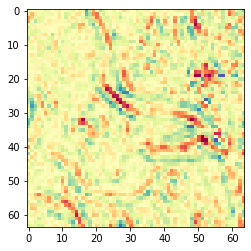

Epoch 12/250
1121/1121 [==============================] - 106s 95ms/step - loss: 5.6386 - accuracy: 0.7484 - val_loss: 5.1856 - val_accuracy: 0.5593

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.185601711273193, 'val_accuracy': 0.5593220591545105, 'loss': 5.638621468505724, 'accuracy': 0.7484389, 'lr': 1e-06}


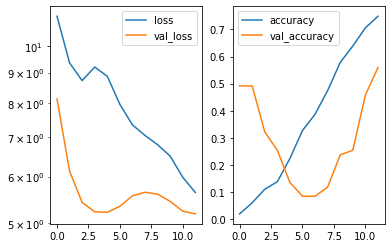

Predicted cell: Cells Probability: [[0.71959054]]
True Cell type: Cells
x [[0.51132494]]
True positional value x 0.65625
y [[0.50939155]]
True positional value y 0.34375
h [[0.44897312]]
True positional value h 0.390625
w [[0.32913274]]
True positional value w 0.390625


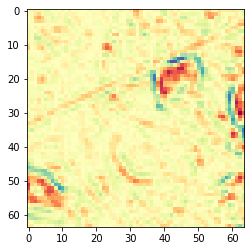

Epoch 13/250
1121/1121 [==============================] - 106s 95ms/step - loss: 5.5758 - accuracy: 0.7636 - val_loss: 5.1936 - val_accuracy: 0.6949

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.193623065948486, 'val_accuracy': 0.694915235042572, 'loss': 5.57581088374918, 'accuracy': 0.7636039, 'lr': 1e-06}


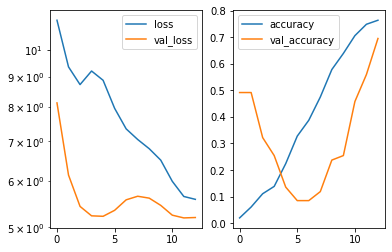

Predicted cell: Cells Probability: [[0.7682452]]
True Cell type: Cells
x [[0.5051768]]
True positional value x 0.34375
y [[0.5089841]]
True positional value y 0.65625
h [[0.45279667]]
True positional value h 0.390625
w [[0.3053033]]
True positional value w 0.390625


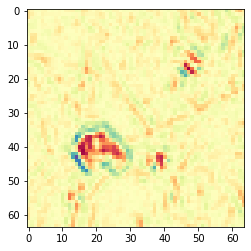

Epoch 14/250
1121/1121 [==============================] - 106s 95ms/step - loss: 5.3808 - accuracy: 0.7752 - val_loss: 5.1566 - val_accuracy: 0.7119

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.156631946563721, 'val_accuracy': 0.7118644118309021, 'loss': 5.380762902037785, 'accuracy': 0.7752007, 'lr': 1e-06}


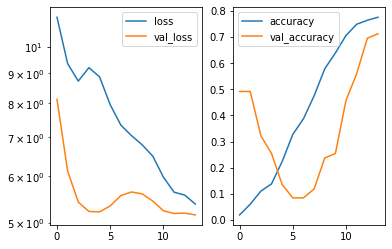

Predicted cell: Cells Probability: [[0.7262608]]
True Cell type: Cells
x [[0.48655298]]
True positional value x 0.5
y [[0.45631558]]
True positional value y 0.34375
h [[0.37639776]]
True positional value h 0.390625
w [[0.34110975]]
True positional value w 0.390625


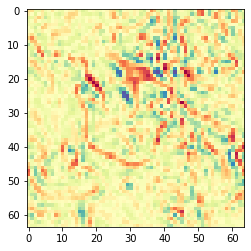

Epoch 15/250
1121/1121 [==============================] - 106s 95ms/step - loss: 5.0419 - accuracy: 0.7832 - val_loss: 5.1271 - val_accuracy: 0.7288

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.127083778381348, 'val_accuracy': 0.7288135886192322, 'loss': 5.041928093737518, 'accuracy': 0.78322923, 'lr': 1e-06}


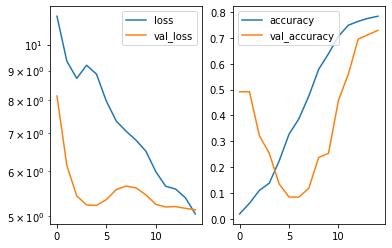

Predicted cell: Cells Probability: [[0.7969388]]
True Cell type: Cells
x [[0.49300897]]
True positional value x 0.34375
y [[0.49247026]]
True positional value y 0.5
h [[0.38449425]]
True positional value h 0.390625
w [[0.286445]]
True positional value w 0.390625


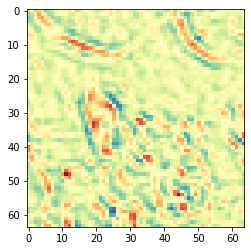

Epoch 16/250
1121/1121 [==============================] - 107s 96ms/step - loss: 4.8283 - accuracy: 0.7904 - val_loss: 5.1835 - val_accuracy: 0.7797

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.183464050292969, 'val_accuracy': 0.7796609997749329, 'loss': 4.828306210881148, 'accuracy': 0.79036576, 'lr': 1e-06}


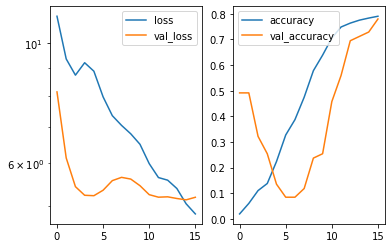

Predicted cell: Cells Probability: [[0.59961873]]
True Cell type: Cells
x [[0.5166258]]
True positional value x 0.5
y [[0.4434989]]
True positional value y 0.34375
h [[0.40962425]]
True positional value h 0.390625
w [[0.33283675]]
True positional value w 0.390625


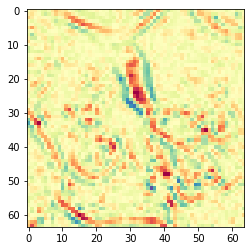

Epoch 17/250
1121/1121 [==============================] - 105s 94ms/step - loss: 4.7437 - accuracy: 0.7993 - val_loss: 5.2278 - val_accuracy: 0.7288

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.227808952331543, 'val_accuracy': 0.7288135886192322, 'loss': 4.743659098588601, 'accuracy': 0.79928637, 'lr': 1e-06}


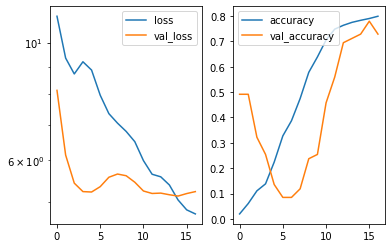

Predicted cell: Cells Probability: [[0.91073745]]
True Cell type: Cells
x [[0.5597359]]
True positional value x 0.5
y [[0.50595295]]
True positional value y 0.34375
h [[0.43967867]]
True positional value h 0.390625
w [[0.3080475]]
True positional value w 0.390625


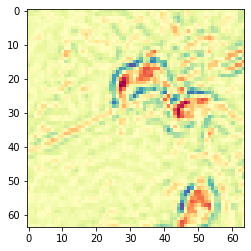

Epoch 18/250
1121/1121 [==============================] - 104s 93ms/step - loss: 4.5818 - accuracy: 0.8073 - val_loss: 5.2215 - val_accuracy: 0.7627

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnet.h5
{'val_loss': 5.22151517868042, 'val_accuracy': 0.7627118825912476, 'loss': 4.581809121301193, 'accuracy': 0.8073149, 'lr': 1e-06}


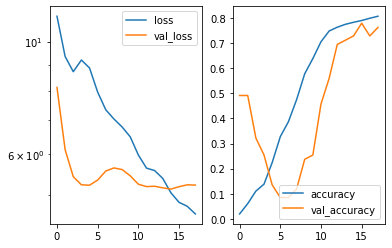

Predicted cell: Cells Probability: [[0.7794617]]
True Cell type: Cells
x [[0.5268841]]
True positional value x 0.65625
y [[0.50112224]]
True positional value y 0.34375
h [[0.40275878]]
True positional value h 0.390625
w [[0.31556472]]
True positional value w 0.390625


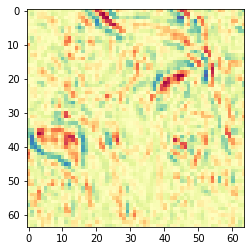

Epoch 19/250
 700/1121 [=================>............] - ETA: 38s - loss: 4.4930 - accuracy: 0.8100

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
